In [179]:
import re, sys
from collections import Counter
from matplotlib import pyplot
import numpy, pandas
from IPython.display import display, Markdown
import json
import os,fnmatch

In [180]:
def load_word_weights(lexicon_file):

    ## Create a mapping from words to numbers
    word_weights = {}
    with open(lexicon_file) as lexicon_reader:
        for line in lexicon_reader:
            weight, word = line.split(",")
            word=word.rstrip()## split on comma
            word_weights[word] = float(weight) ## convert string to number
    
    return word_weights

In [181]:
word_weights = load_word_weights("bingliu.csv")

In [182]:
## This function applies the word weights to a list of word counts
def score_counts(counter, word_weights):
    ## accumulate word weights in this variable
    score = 0
    
    ## count the words in the passage
    total_tokens = sum(counter.values())
    ## check for empty segments
    if total_tokens == 0:
        return 0
    
    ## for each word, look up its score
    for word in counter.keys():
        if word in word_weights:
            score += word_weights[word] * counter[word]
    return score/total_tokens
#     return score

#longer paragraphs arent overweighted

In [ ]:
## This function applies the word weights to a list of word counts
def score_counts(counter, word_weights):
    ## accumulate word weights in this variable
    score = 0
    
    ## count the words in the passage
    total_tokens = sum(counter.values())
    ## check for empty segments
    if total_tokens == 0:
        return 0
    
    ## for each word, look up its score
    for word in counter.keys():
        if word in word_weights:
            score += word_weights[word] * counter[word]
    return score/total_tokens
#     return score

#longer paragraphs arent overweighted

In [208]:
from datetime import datetime

datetime_object = datetime.strptime('2019-05-07', '%Y-%M-%d')
datetime_object

datetime.datetime(2019, 1, 7, 0, 5)

In [214]:
def load_album(text_file):

    ## Here's an example of a simple pattern defining a word token. 
    word_pattern = re.compile("\w[\w\-\']*\w|\w") ## what matches this?

    ## Now look at the actual documents. We'll create a list with one object per text segment.
    paragraphs = []
    with open(text_file) as json_file:
        data = json.load(json_file)
#         print (type(data))
    ## here's where we actually read the file
#     with open(text_file, encoding="utf-8") as file:
#         print (type(file))
        ## This block reads a file line by line.
        for line in data["songs"]:
#             print (line)
#             print (type(line))
#             print (line[0])
            date=datetime.strptime(line["year"], '%Y-%M-%d')
            title=line['title']
            album=line['album']
            line = line['lyrics'].rstrip()
#             print (line)
            tokens = word_pattern.findall(line)
#             print (tokens)
#             ## turn a list into a word->count map
            paragraph_counts = Counter(tokens)
        
#             ## create the paragraph object, with the original text, 
#             ##  the word counts, and the total score.
#             print (line['title'])
            paragraphs.append({'title': title,'album':album,'text': line,"release_date":date, 'counts': paragraph_counts,
                               'score': score_counts(paragraph_counts, word_weights) })

    return paragraphs

In [215]:
#for one album
songs = load_album("../Lyrics_Tyler,TheCreator{.Igor.json")

In [216]:
songs

[{'title': 'EARFQUAKE',
  'album': 'IGOR',
  'text': "For real, for real this time\nFor real, for real, for real this time\nBitch, I cannot fall short\nFor real, for real, for real this time (Yeah, yeah)\nFor real, for real, for real this time\n\n'Cause you make my earth quake\nOh, you make my earth quake\nRiding around, your love be shakin’ me up\nAnd it's making my heart break\n'Cause you make my earth quake\nOh, you make my earth quake (Earthquake, ooh)\nRiding around, your love be shakin’ me up\nAnd it's making my heart break\n\nDon't leave, it's my fault\nDon't leave, it's my fault\nDon't leave, it's my fault (Girl)\n’Cause when it all comes crashing down I’ll need you\n\n'Cause you make my earth quake\nOh, you make my earth quake\nRiding around, you’re telling me something is bad\nAnd it's making my heart break\n'Cause you make my earth quake, oh, you make my earth quake\n(Earth quake, yeah)\nRiding around, your love be shakin' me up\nAnd it’s making my heart break (You already k

In [217]:
sorted_song = sorted(songs, key=lambda x: x["score"])
#paragraphs are very long, the number of words is proprotional to a larger scores
## Display the 10 most negative
for song in sorted_song[0:9]:
    print("{}\n{}".format(song['score'], song['text']))

## ... and the 10 most positive
for song in sorted_song[-10:-1]:
    print("{}\n{}".format(song['score'], song['text']))
    
#smoothing parameter?

-0.03896103896103896
For real, for real this time
For real, for real, for real this time
Bitch, I cannot fall short
For real, for real, for real this time (Yeah, yeah)
For real, for real, for real this time

'Cause you make my earth quake
Oh, you make my earth quake
Riding around, your love be shakin’ me up
And it's making my heart break
'Cause you make my earth quake
Oh, you make my earth quake (Earthquake, ooh)
Riding around, your love be shakin’ me up
And it's making my heart break

Don't leave, it's my fault
Don't leave, it's my fault
Don't leave, it's my fault (Girl)
’Cause when it all comes crashing down I’ll need you

'Cause you make my earth quake
Oh, you make my earth quake
Riding around, you’re telling me something is bad
And it's making my heart break
'Cause you make my earth quake, oh, you make my earth quake
(Earth quake, yeah)
Riding around, your love be shakin' me up
And it’s making my heart break (You already know)

We ain't gotta ball, D. Rose, huh
I don't give a fuck 

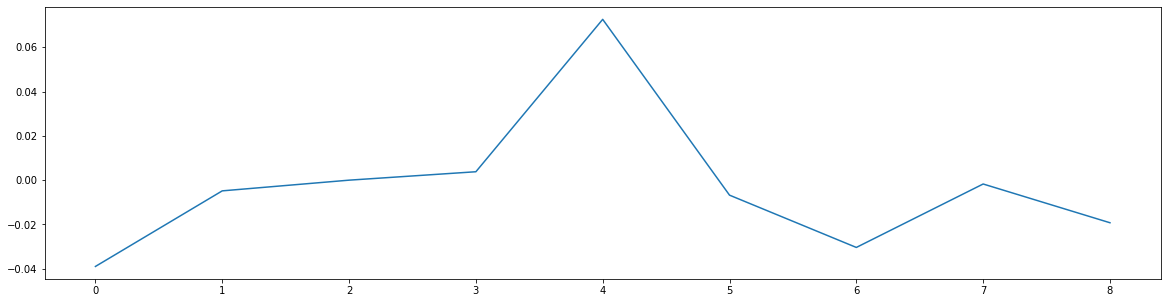

In [218]:
sentiment_scores = numpy.array([p["score"] for p in songs])

pyplot.figure(figsize=(20, 5))
pyplot.plot(sentiment_scores)
pyplot.show()

In [220]:
def find_all(name, path):
    l=[]
    for filename in os.listdir(path):
#         print (filename)
        if fnmatch.fnmatch(filename,"*"+name+"*"):
            l.append(filename)
    print (l)
    return l

In [221]:
#all albums for the artist

def load_artist(artist):
    
    complete=[]
    filenames=find_all(artist,"../")
    
    
    for file in filenames:
         complete.extend(load_album("../"+file))
            
    return complete

In [222]:
# Every song and theire score for one artist in a dictionary
completeartist=load_artist("Tyler,")

['Lyrics_Tyler,TheCreator{.Golbin.json', 'Lyrics_Tyler,TheCreator{.Flower-Boy.json', 'Lyrics_Tyler,TheCreator{.Igor.json', 'Lyrics_Tyler,TheCreator{.Bastard.json', 'Lyrics_Tyler,TheCreator{.Cherry-Bomb.json', 'Lyrics_Tyler,TheCreator{.Wolf.json']


In [223]:
completeartist

[{'title': 'Goblin',
  'album': 'Goblin',
  'text': 'You wouldn\'t do that Tyler, kill yourself or anyone. You don\'t even have the balls to begin with. What you need is me, someone to talk to, uh, it\'s been a while since our last session. So, tell me what\'s been going on\n\nI\'m not a fucking role model (I know this)\nI\'m a 19 year old fucking emotional coaster with pipe dreams\nSince Kanye tweeted telling people he\'s bumping all of my shit\nThese mothafuckas think I\'m \'sposed to live up to something? Shit\nI\'m still jacking off and proceeding my life careless\nBut getting more pussy \'cause I tell bitches I\'m Wood Harris (as you should)\nPhilly to Paris, I\'m getting these weird stares\nAt skateparks and airports all in a year, it\'s weird\nYonkers dropped and left them craniums mindfucked\nNow competition missing like that nigga my mom fucked\nHe still hasn\'t called me yet (that\'s not your fault)\nBut that\'s a whole fucking different argument, shit, I got over it\nAnd a c

In [224]:
sorted_songs_artist = sorted(completeartist, key=lambda x: x["score"])
#paragraphs are very long, the number of words is proprotional to a larger scores
## Display the 10 most negative
for song in sorted_songs_artist[0:9]:
    print("{}\n{}".format(song['score'], song['text']))




-0.21200750469043153
Oh, shit (Swag)
Three icy ass niggas from Odd Future doin' some crazy shit (Bitch)
By the way, we do punch bitches, huh

I'm swagging bitch (Swag), I'm iced out (Iced out)
Oh, you mad, bitch? (Bitch) 'Cause I'm laying on the couch (Woo)
Smoke a blunt, fuck a bitch in the butt, I'm bossing (Bow, bow)
Don't give a fuck, I never roll Slauson
I'm fly bitch, I should poke you in your eye bitch
Got the burner bitch, bow, bow (Bow)
You dead bitch, I'm hot as fuck
I ain't never cold, but I'm icy bitch (Woo)

My bitch suck dick like she suck dick
My bitch suck dick like she suck dick (Bow, bow, bow)
My bitch suck dick like (What) she suck dick
My bitch suck dick like she suck dick (Bow, bow)

Got the bops in the house, socking bitches in they mouth (Bitch)
See my neck? Iced the fuck out (I'm getting money, nigga)
She at the fucking mall, 40 bitches on my nutsack
I pulled up on a mothafuckin' unicorn (I'm getting ponies, nigga)
Wolf Gang, nigga
Scream that 'till they motherf

In [225]:
## ... and the 10 most positive
for song in sorted_songs_artist[-10:-1]:
    print("\n{}\n{}\n{}\n\n{}".format(song['score'],song['album'],song['title'],song['text']))
    
#smoothing parameter?


0.0037735849056603774
Flower Boy
Garden Shed

Don't kill a rose
Before it could bloom
Fly, baby, fly
Out the cocoon

You don't have to hide
I can smell it in your eyes
That there's something more to say, baby
Them words
Damn, run me back, yeah

If I could, if I could
If you could
Find the words to say
Find the words to say
Find the words
In the garden
Shed
Go

Don't kill a rose
Before it could bloom
Fly, baby, fly
Out the cocoon

Ayo
Garden shed, garden shed, garden shed, garden shed
For the garden
That is where I was hidin'
That was real love I was in
Ain't no reason to pretend
Garden shed, garden shed, garden shed
Garden shed for the garçons
Them feelings that I was guardin'
Heavy on my mind
All my friends lost
They couldn't read the signs
I didn't wanna talk and tell 'em my location
And they ain't wanna walk
Truth is, since a youth kid, thought it was a phase
Thought it'd be like the phrase; "poof," gone
But, it's still goin' on
Big fan of the beige tan
Polka dot nose, how it goes


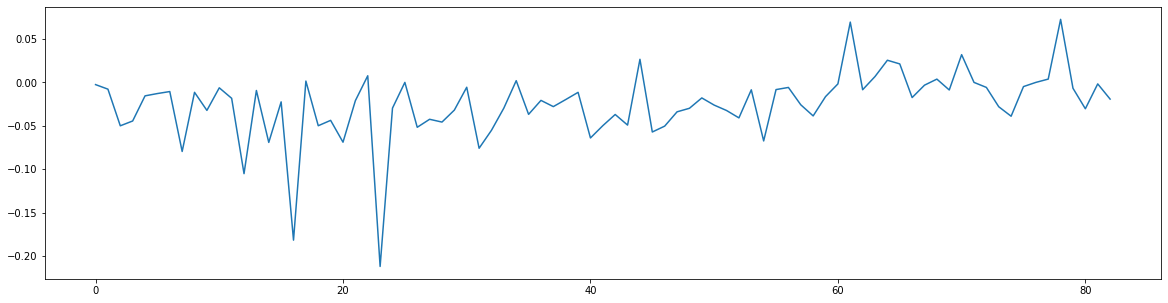

In [227]:
# sort by release date
sorted_songs_artist = sorted(completeartist, key=lambda x: x["release_date"])
sentiment_scores = numpy.array([p["score"] for p in sorted_songs_artist])

pyplot.figure(figsize=(20, 5))
pyplot.plot(sentiment_scores)
pyplot.show()

Next Steps?-
playcount vs sentiment score for top 10 scores

In [228]:
completeartist=load_artist("Frank")

['Lyrics_FrankOcean{.Channel-Orange.json', 'Lyrics_FrankOcean{.nostalgia-ULTRA.json', 'Lyrics_FrankOcean{.Blonde.json', 'Lyrics_FrankOcean{.Endless.json']


In [229]:
sorted_songs_artist = sorted(completeartist, key=lambda x: x["score"])
#paragraphs are very long, the number of words is proprotional to a larger scores
## Display the 10 most negative
for song in sorted_songs_artist[0:9]:
    print("{}\n{}".format(song['score'], song['text']))




-0.07692307692307693
You don't know how little you matter until you're all alone
In the middle of Arkansas with a little rock left in that glass dick
Used to date a blonde, you used to hit it raw
'Cause she was and you are madly involved, madly involved

Hittin' stones in glass homes
You're smokin' stones in abandoned homes
You hit them stones and broke your home
Crack rock, crack rock
Crack rock, crack rock
Hittin' stones in glass homes
You're smokin' stones in abandoned homes
You hit them stones and broke your home
Crack rock, crack rock
Crack rock, crack rock

You're shuckin' and jivin', stealin' and robbin'
To get the fixing that you're itching for
Your family stopped inviting you to things
Won't let you hold their infant
You used to to get a little cut-up from time to time
But the freaks ain't trying to sleep with cracky

Hittin' stones in glass homes
You're smokin' stones in abandoned homes
You hit them stones and you broke your home
Crack rock
Crack rock, crack rock

Crooked cop

In [230]:
## ... and the 10 most positive
for song in sorted_songs_artist[-10:-1]:
    print("\n{}\n{}\n{}\n\n{}".format(song['score'],song['album'],song['title'],song['text']))
    
#smoothing parameter?


0.030303030303030304
Blonde 
White Ferrari

Bad luck to talk on these rides
Mine on the road, your dilated eyes watch the clouds float
White Ferrari, had a good time
(Sweet 16, how was I supposed to know anything?)
I let you out at Central
I didn't care to state the plain
Kept my mouth closed, we're both so familiar
White Ferrari, good times
Stick by me, close by me
You were fine, you were fine here
That's just a slow body
You left when I forgot to speak
So I text the speech, lesser speeds, Texas speed, yes
Basic takes its toll on me, 'ventually, 'ventually, yes
Ahh, on me 'ventually, 'ventually, yes
I care for you still and I will forever
That was my part of the deal, honest
We got so familiar
Spending each day of the year
White Ferrari, good times
In this life (life), in this life (life)
One too many years
Some tattooed eyelids on a facelift
(Thought you might want to know now)
Mind over matter is magic, I do magic
If you think about it, it'll be over in no time
And that's life
I'm 

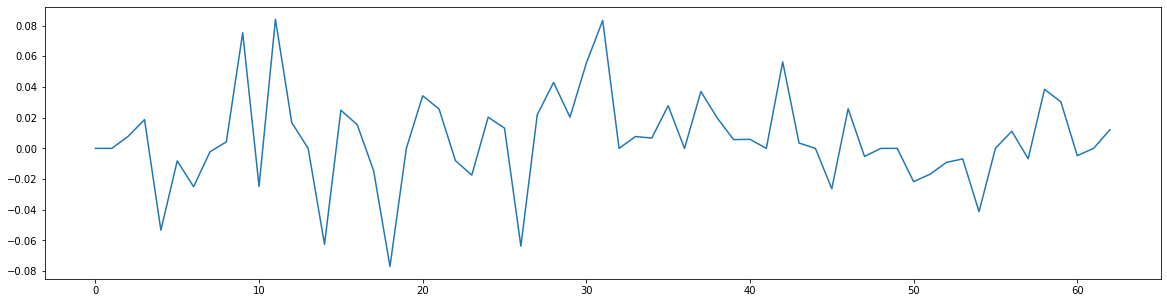

In [231]:
sorted_songs_artist = sorted(completeartist, key=lambda x: x["release_date"])
sentiment_scores = numpy.array([p["score"] for p in sorted_songs_artist])

pyplot.figure(figsize=(20, 5))
pyplot.plot(sentiment_scores)
pyplot.show()

In [232]:
completeartist=load_artist("Childish")

['Lyrics_ChildishGambino{.Summer-Pack', 'Lyrics_ChildishGambino{.Culdesac', 'Lyrics_ChildishGambino{.I-Am-Just-a-Rapper', 'Lyrics_ChildishGambino{.Because-the-Internet', 'Lyrics_ChildishGambino{.Camp']


In [233]:
sorted_songs_artist = sorted(completeartist, key=lambda x: x["score"])
#paragraphs are very long, the number of words is proprotional to a larger scores
## Display the 10 most negative
for song in sorted_songs_artist[0:9]:
    print("{}\n{}".format(song['score'], song['text']))




-0.06563706563706563
Welcome to the culdesac, this is where the street ends
I am just a rapper, I ain't got the time for speakin'
Nigga stay weak like tornado and a tree branch
I never have a weak day, my life's a long weekend
Fuckin' with ya raw, bitch, my mouth should get tested
Sleepin' on a nigga, hope you feel well rested
Gambino stay on, can't nobody pull the cord out
A nigga fucked up, like a hang gliding whore house
Sick boy, yeah, the clique on deck
Yes, I rap absurd, got the game upset
And they rap about the jewelry, the weed they smoke
And I rap about my life, and niggas think it's a joke, nah
I only put real on a nigga
Bitches see the money, try and steal on a nigga
Yes, I'm on fire, you can feel it on a nigga
Step away from the heat; they Shaquillin' on a nigga
Treat niggas like pussy, go hard on 'em
Watch the swagga get swiped like a card, bottom
The swag's unique, I don't even worry 'bout 'em
I got the tortoise shell frames and the argyle
You wouldn't think from the thin

In [234]:
## ... and the 10 most positive
for song in sorted_songs_artist[-10:-1]:
    print("\n{}\n{}\n{}\n\n{}".format(song['score'],song['album'],song['title'],song['text']))
    
#smoothing parameter?


0.0321285140562249
Culdesac
So Fly

You are the bestest, I will obey you
They wanna know what, I couldn't say who
You are the only one who's ever really seen me
I know that I'm the reason that you don't watch any TV
I wanna lay on your stomach so bad
And it gets a little quiet in this bachelor pad
And I don't really understand the thing we had
I wanna try again, but it would just be sad
And oh, oh whoa
You are the only one who's ever let me be me

We can make it easy, we can do it simple
I'll be waiting right there, promise to be gentle
Sitting by your window, girl, you're so fly to me

So fly, girl, you're so fly
So fly, girl, you're so fly
So fly, girl, you're so fly to me
So fly, girl, you're so fly
So fly, girl, you're so fly
So fly, girl, you're so fly to me

Oh, oh
Oh, yeah
Oh, oh
Oh, yeah
Oh, yeah
Will it be tonight
I won't let you down, oh
Oh

We can make it easy, we can do it simple
I'll be waiting right there, promise to be gentle
Sitting by your window, girl, you're so fly 

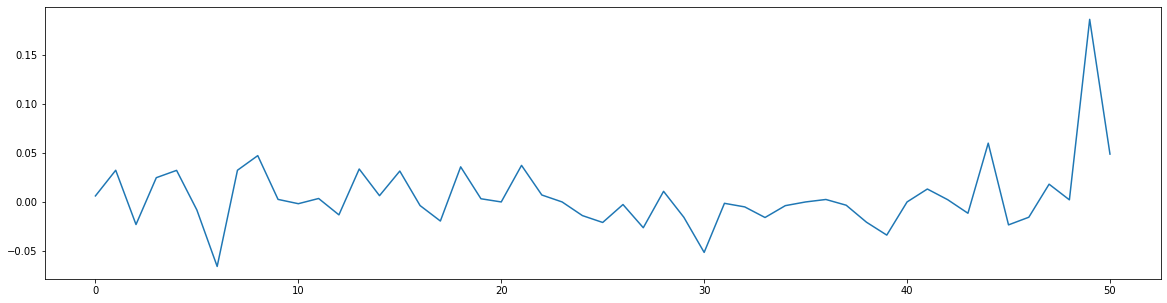

In [238]:

sorted_songs_artist = sorted(completeartist, key=lambda x: x["release_date"])
# print (sorted_songs_artist)
sentiment_scores = numpy.array([p["score"] for p in sorted_songs_artist])

pyplot.figure(figsize=(20, 5))
pyplot.plot(sentiment_scores)
pyplot.show()